In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# PREDICTING FUNCTION

In [163]:
# read data for experimentally determined structures in complex with active molecules
df = pd.read_csv('../data/364_interaction_energies_state_function_v4.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to structure_df
structure_df = df.copy()
# structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field to denote if entry is crystallized, docked, etc.
structure_df['entry_type'] = 'experimentally determined active'

In [164]:
# read data for best scoring docked poses of inactive molecules
df = pd.read_csv('../data/dude_docking_data/dude_interaction_energies.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
dock_structure_df = df.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
dock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
dock_structure_df['entry_type'] = 'docked inactive'

In [165]:
# read data for best scoring docked poses of inactive molecules
df1 = pd.read_csv('../data/selfdock_docking_data/selfdock_interaction_energies.txt', sep='\t')

#drop index
df1.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
selfdock_structure_df = df1.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
selfdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
selfdock_structure_df['entry_type'] = 'self-docked active'

In [166]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df2 = pd.read_csv('../data/selfdock_docking_data/nontestset_selfdock_interaction_energies.txt', sep='\t')

#drop index
df2.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
nontestset_selfdock_structure_df = df2.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
nontestset_selfdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
nontestset_selfdock_structure_df['entry_type'] = 'self-docked active'

In [167]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df3 = pd.read_csv('../data/crossdock_docking_data/crossdock_interaction_energies.txt', sep=',')

#drop index
df3.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
crossdock_structure_df = df3.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
crossdock_structure_df.drop(['State'], axis = 1, inplace = True)

# add entry_type field
crossdock_structure_df['entry_type'] = 'cross-docked active'

In [168]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df4 = pd.read_csv('../data/hm_docking_data/dude_actives_hmdock_interaction_energies.txt', sep=',')

#drop index
df4.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
active_hmdock_structure_df = df4.copy()

# add entry_type field
active_hmdock_structure_df['entry_type'] = 'HM docked active'

active_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

In [169]:
# read data for best scoring docked poses of inactive molecules that weren't in the old test set
df5 = pd.read_csv('../data/hm_docking_data/dude_inactives_hmdock_interaction_energies.txt', sep=',')

#drop index
df5.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
inactive_hmdock_structure_df = df5.copy()

# add entry_type field
inactive_hmdock_structure_df['entry_type'] = 'HM docked inactive'

inactive_hmdock_structure_df.rename({'Target':'PDBID'}, axis=1, inplace = True)

In [170]:
print('ED structures:', len(structure_df))
print('DUD-E docked inactives:', len(dock_structure_df))
print('test set self docked actives:', len(selfdock_structure_df))
print('non-test set self docked actives:', len(nontestset_selfdock_structure_df))
print('cross docked actives:', len(crossdock_structure_df))
print('HM docked actives:', len(active_hmdock_structure_df))
print('HM docked inactives:', len(inactive_hmdock_structure_df))
print('total structures:', len(structure_df) + len(dock_structure_df) + len(selfdock_structure_df) + len(nontestset_selfdock_structure_df) + len(crossdock_structure_df) + len(active_hmdock_structure_df) + len(inactive_hmdock_structure_df))

ED structures: 364
DUD-E docked inactives: 285
test set self docked actives: 105
non-test set self docked actives: 259
cross docked actives: 331
HM docked actives: 240
HM docked inactives: 285
total structures: 1869


In [171]:
# join all datasets
frames = [structure_df, dock_structure_df, selfdock_structure_df, nontestset_selfdock_structure_df, crossdock_structure_df, active_hmdock_structure_df, inactive_hmdock_structure_df] 
structure_df = pd.concat(frames)

# reset index of structure_df
structure_df.reset_index(inplace = True, drop = True)

In [172]:
structure_df.to_csv('structure_df_initial.csv')

In [173]:
# drop entries with bad ligand placement
PDBs_toremove = [
    '4LDL',
    '4LDO',
    '7VDL',
    '7VDM',
    '7VUY',
    '7VUZ',
    '7VV0',
    '7VV3',
    '7VV4',
    '7VV5',
    '7NA7',
    '7FIG',
    '7FIH',
    '7P02',
    '7P00',
    '4U15',
    '2YCX',
    '6YVR',
    '5T04',
    '4XEE',
    '4XES',
    '4GRV'
]

to_drop = []

for i in range(len(structure_df)):
    if structure_df.iloc[i,:]['PDBID'] in PDBs_toremove:
        to_drop.append(i)

structure_df.drop(to_drop, inplace = True)

In [174]:
len(PDBs_toremove)

22

### Default Method of Dropping Residues

In [14]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    print('percentage of structures with interactions at position', resnum, ':', (structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum()/len(structure_df[intenergysum_col])) * 100)
    if structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum() < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

structures with interactions at position 1.21 : 0
percentage of structures with interactions at position 1.21 : 0.0
dropped columns for residue:  1.21 

structures with interactions at position 1.22 : 0
percentage of structures with interactions at position 1.22 : 0.0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
percentage of structures with interactions at position 1.23 : 0.0
dropped columns for residue:  1.23 

structures with interactions at position 1.24 : 0
percentage of structures with interactions at position 1.24 : 0.0
dropped columns for residue:  1.24 

structures with interactions at position 1.25 : 2
percentage of structures with interactions at position 1.25 : 0.10989010989010989
dropped columns for residue:  1.25 

structures with interactions at position 1.26 : 0
percentage of structures with interactions at position 1.26 : 0.0
dropped columns for residue:  1.26 

structures with interactions at position 1.27 : 4
percentage of st

structures with interactions at position 2.60 : 184
percentage of structures with interactions at position 2.60 : 10.10989010989011
structures with interactions at position 2.61 : 232
percentage of structures with interactions at position 2.61 : 12.747252747252746
structures with interactions at position 2.62 : 3
percentage of structures with interactions at position 2.62 : 0.16483516483516483
dropped columns for residue:  2.62 

structures with interactions at position 2.63 : 52
percentage of structures with interactions at position 2.63 : 2.857142857142857
structures with interactions at position 2.64 : 296
percentage of structures with interactions at position 2.64 : 16.263736263736263
structures with interactions at position 2.65 : 93
percentage of structures with interactions at position 2.65 : 5.1098901098901095
structures with interactions at position 2.66 : 3
percentage of structures with interactions at position 2.66 : 0.16483516483516483
dropped columns for residue:  2.66 

s

structures with interactions at position 3.67 : 0
percentage of structures with interactions at position 3.67 : 0.0
dropped columns for residue:  3.67 

structures with interactions at position 3.68 : 0
percentage of structures with interactions at position 3.68 : 0.0
dropped columns for residue:  3.68 

structures with interactions at position 3.69 : 0
percentage of structures with interactions at position 3.69 : 0.0
dropped columns for residue:  3.69 

structures with interactions at position 3.70 : 0
percentage of structures with interactions at position 3.70 : 0.0
dropped columns for residue:  3.70 

structures with interactions at position 3.71 : 0
percentage of structures with interactions at position 3.71 : 0.0
dropped columns for residue:  3.71 

structures with interactions at position 4.29 : 0
percentage of structures with interactions at position 4.29 : 0.0
dropped columns for residue:  4.29 

structures with interactions at position 4.30 : 0
percentage of structures with in

dropped columns for residue:  5.52 

structures with interactions at position 5.53 : 1
percentage of structures with interactions at position 5.53 : 0.054945054945054944
dropped columns for residue:  5.53 

structures with interactions at position 5.54 : 0
percentage of structures with interactions at position 5.54 : 0.0
dropped columns for residue:  5.54 

structures with interactions at position 5.55 : 0
percentage of structures with interactions at position 5.55 : 0.0
dropped columns for residue:  5.55 

structures with interactions at position 5.56 : 0
percentage of structures with interactions at position 5.56 : 0.0
dropped columns for residue:  5.56 

structures with interactions at position 5.57 : 0
percentage of structures with interactions at position 5.57 : 0.0
dropped columns for residue:  5.57 

structures with interactions at position 5.58 : 0
percentage of structures with interactions at position 5.58 : 0.0
dropped columns for residue:  5.58 

structures with interactions

dropped columns for residue:  6.46 

structures with interactions at position 6.47 : 4
percentage of structures with interactions at position 6.47 : 0.21978021978021978
dropped columns for residue:  6.47 

structures with interactions at position 6.48 : 512
percentage of structures with interactions at position 6.48 : 28.13186813186813
structures with interactions at position 6.49 : 5
percentage of structures with interactions at position 6.49 : 0.27472527472527475
dropped columns for residue:  6.49 

structures with interactions at position 6.50 : 4
percentage of structures with interactions at position 6.50 : 0.21978021978021978
dropped columns for residue:  6.50 

structures with interactions at position 6.51 : 962
percentage of structures with interactions at position 6.51 : 52.85714285714286
structures with interactions at position 6.52 : 709
percentage of structures with interactions at position 6.52 : 38.956043956043956
structures with interactions at position 6.53 : 2
percentag

dropped columns for residue:  7.62 

structures with interactions at position 7.63 : 0
percentage of structures with interactions at position 7.63 : 0.0
dropped columns for residue:  7.63 

structures with interactions at position 7.64 : 0
percentage of structures with interactions at position 7.64 : 0.0
dropped columns for residue:  7.64 

structures with interactions at position 7.65 : 0
percentage of structures with interactions at position 7.65 : 0.0
dropped columns for residue:  7.65 

structures with interactions at position 7.66 : 0
percentage of structures with interactions at position 7.66 : 0.0
dropped columns for residue:  7.66 

structures with interactions at position 7.67 : 0
percentage of structures with interactions at position 7.67 : 0.0
dropped columns for residue:  7.67 

structures with interactions at position 7.68 : 0
percentage of structures with interactions at position 7.68 : 0.0
dropped columns for residue:  7.68 

structures with interactions at position 5.28

### Dropping Residues that Possess Interactions in <10% of Structures

In [119]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    print('number of structures:', len(structure_df[intenergysum_col]))
    print('number of structures with this residue:', len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()]))
    print('percentage of structures with interactions at position', resnum, '(all structures):', (structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum()/len(structure_df[intenergysum_col])) * 100)
    print('percentage of structures with interactions at position', resnum, '(structures with this residue):', (structure_df[intenergysum_col][(structure_df[intenergysum_col].notnull()) & (structure_df[intenergysum_col] != 0)].value_counts().sum()/len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()])) * 100)
    if ((structure_df[intenergysum_col][(structure_df[intenergysum_col].notnull()) & (structure_df[intenergysum_col] != 0)].value_counts().sum()/len(structure_df[intenergysum_col][structure_df[intenergysum_col].notnull()])) * 100) < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

structures with interactions at position 1.21 : 0
number of structures: 1820
number of structures with this residue: 9
percentage of structures with interactions at position 1.21 (all structures): 0.0
percentage of structures with interactions at position 1.21 (structures with this residue): 0.0
dropped columns for residue:  1.21 

structures with interactions at position 1.22 : 0
number of structures: 1820
number of structures with this residue: 9
percentage of structures with interactions at position 1.22 (all structures): 0.0
percentage of structures with interactions at position 1.22 (structures with this residue): 0.0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
number of structures: 1820
number of structures with this residue: 115
percentage of structures with interactions at position 1.23 (all structures): 0.0
percentage of structures with interactions at position 1.23 (structures with this residue): 0.0
dropped columns for residue:  1.2

structures with interactions at position 1.45 : 0
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 1.45 (all structures): 0.0
percentage of structures with interactions at position 1.45 (structures with this residue): 0.0
dropped columns for residue:  1.45 

structures with interactions at position 1.46 : 1
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 1.46 (all structures): 0.054945054945054944
percentage of structures with interactions at position 1.46 (structures with this residue): 0.054945054945054944
dropped columns for residue:  1.46 

structures with interactions at position 1.47 : 0
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 1.47 (all structures): 0.0
percentage of structures with interactions at position 1.47 (structures with this residu

structures with interactions at position 2.43 : 0
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 2.43 (all structures): 0.0
percentage of structures with interactions at position 2.43 (structures with this residue): 0.0
dropped columns for residue:  2.43 

structures with interactions at position 2.44 : 0
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 2.44 (all structures): 0.0
percentage of structures with interactions at position 2.44 (structures with this residue): 0.0
dropped columns for residue:  2.44 

structures with interactions at position 2.45 : 0
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 2.45 (all structures): 0.0
percentage of structures with interactions at position 2.45 (structures with this residue): 0.0
dropped columns for residu

dropped columns for residue:  3.19 

structures with interactions at position 3.20 : 0
number of structures: 1820
number of structures with this residue: 12
percentage of structures with interactions at position 3.20 (all structures): 0.0
percentage of structures with interactions at position 3.20 (structures with this residue): 0.0
dropped columns for residue:  3.20 

structures with interactions at position 3.21 : 6
number of structures: 1820
number of structures with this residue: 408
percentage of structures with interactions at position 3.21 (all structures): 0.32967032967032966
percentage of structures with interactions at position 3.21 (structures with this residue): 1.4705882352941175
dropped columns for residue:  3.21 

structures with interactions at position 3.22 : 4
number of structures: 1820
number of structures with this residue: 1504
percentage of structures with interactions at position 3.22 (all structures): 0.21978021978021978
percentage of structures with interaction

structures with interactions at position 3.53 : 5
number of structures: 1820
number of structures with this residue: 1664
percentage of structures with interactions at position 3.53 (all structures): 0.27472527472527475
percentage of structures with interactions at position 3.53 (structures with this residue): 0.3004807692307693
dropped columns for residue:  3.53 

structures with interactions at position 3.54 : 1
number of structures: 1820
number of structures with this residue: 1572
percentage of structures with interactions at position 3.54 (all structures): 0.054945054945054944
percentage of structures with interactions at position 3.54 (structures with this residue): 0.06361323155216285
dropped columns for residue:  3.54 

structures with interactions at position 3.55 : 0
number of structures: 1820
number of structures with this residue: 1344
percentage of structures with interactions at position 3.55 (all structures): 0.0
percentage of structures with interactions at position 3.5

structures with interactions at position 4.40 : 0
number of structures: 1820
number of structures with this residue: 1498
percentage of structures with interactions at position 4.40 (all structures): 0.0
percentage of structures with interactions at position 4.40 (structures with this residue): 0.0
dropped columns for residue:  4.40 

structures with interactions at position 4.41 : 2
number of structures: 1820
number of structures with this residue: 1779
percentage of structures with interactions at position 4.41 (all structures): 0.10989010989010989
percentage of structures with interactions at position 4.41 (structures with this residue): 0.11242270938729623
dropped columns for residue:  4.41 

structures with interactions at position 4.42 : 1
number of structures: 1820
number of structures with this residue: 1795
percentage of structures with interactions at position 4.42 (all structures): 0.054945054945054944
percentage of structures with interactions at position 4.42 (structures w

structures with interactions at position 5.33 : 0
number of structures: 1820
number of structures with this residue: 328
percentage of structures with interactions at position 5.33 (all structures): 0.0
percentage of structures with interactions at position 5.33 (structures with this residue): 0.0
dropped columns for residue:  5.33 

structures with interactions at position 5.34 : 7
number of structures: 1820
number of structures with this residue: 428
percentage of structures with interactions at position 5.34 (all structures): 0.38461538461538464
percentage of structures with interactions at position 5.34 (structures with this residue): 1.6355140186915886
dropped columns for residue:  5.34 

structures with interactions at position 5.35 : 99
number of structures: 1820
number of structures with this residue: 858
percentage of structures with interactions at position 5.35 (all structures): 5.43956043956044
percentage of structures with interactions at position 5.35 (structures with thi

percentage of structures with interactions at position 5.61 (structures with this residue): 0.0
dropped columns for residue:  5.61 

structures with interactions at position 5.62 : 0
number of structures: 1820
number of structures with this residue: 1712
percentage of structures with interactions at position 5.62 (all structures): 0.0
percentage of structures with interactions at position 5.62 (structures with this residue): 0.0
dropped columns for residue:  5.62 

structures with interactions at position 5.63 : 0
number of structures: 1820
number of structures with this residue: 1712
percentage of structures with interactions at position 5.63 (all structures): 0.0
percentage of structures with interactions at position 5.63 (structures with this residue): 0.0
dropped columns for residue:  5.63 

structures with interactions at position 5.64 : 0
number of structures: 1820
number of structures with this residue: 1651
percentage of structures with interactions at position 5.64 (all struct

dropped columns for residue:  6.15 

structures with interactions at position 6.16 : 0
number of structures: 1820
number of structures with this residue: 6
percentage of structures with interactions at position 6.16 (all structures): 0.0
percentage of structures with interactions at position 6.16 (structures with this residue): 0.0
dropped columns for residue:  6.16 

structures with interactions at position 6.17 : 0
number of structures: 1820
number of structures with this residue: 6
percentage of structures with interactions at position 6.17 (all structures): 0.0
percentage of structures with interactions at position 6.17 (structures with this residue): 0.0
dropped columns for residue:  6.17 

structures with interactions at position 6.18 : 0
number of structures: 1820
number of structures with this residue: 6
percentage of structures with interactions at position 6.18 (all structures): 0.0
percentage of structures with interactions at position 6.18 (structures with this residue): 0.

structures with interactions at position 6.48 : 512
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 6.48 (all structures): 28.13186813186813
percentage of structures with interactions at position 6.48 (structures with this residue): 28.13186813186813
structures with interactions at position 6.49 : 5
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 6.49 (all structures): 0.27472527472527475
percentage of structures with interactions at position 6.49 (structures with this residue): 0.27472527472527475
dropped columns for residue:  6.49 

structures with interactions at position 6.50 : 4
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 6.50 (all structures): 0.21978021978021978
percentage of structures with interactions at position 6.50 (structures with this

percentage of structures with interactions at position 7.42 (all structures): 6.538461538461539
percentage of structures with interactions at position 7.42 (structures with this residue): 6.545654565456546
dropped columns for residue:  7.42 

structures with interactions at position 7.43 : 247
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 7.43 (all structures): 13.571428571428571
percentage of structures with interactions at position 7.43 (structures with this residue): 13.571428571428571
structures with interactions at position 7.44 : 0
number of structures: 1820
number of structures with this residue: 1820
percentage of structures with interactions at position 7.44 (all structures): 0.0
percentage of structures with interactions at position 7.44 (structures with this residue): 0.0
dropped columns for residue:  7.44 

structures with interactions at position 7.45 : 7
number of structures: 1820
number of s

structures with interactions at position 7.68 : 0
number of structures: 1820
number of structures with this residue: 18
percentage of structures with interactions at position 7.68 (all structures): 0.0
percentage of structures with interactions at position 7.68 (structures with this residue): 0.0
dropped columns for residue:  7.68 

structures with interactions at position 5.28 : 0
number of structures: 1820
number of structures with this residue: 3
percentage of structures with interactions at position 5.28 (all structures): 0.0
percentage of structures with interactions at position 5.28 (structures with this residue): 0.0
dropped columns for residue:  5.28 



# 

In [175]:
uniq_residues = []
cols = list(structure_df.columns[2:])

for col in cols:
    res = col[:4]
    if res not in uniq_residues:
        uniq_residues.append(res)
        
print('residues used as predictors:', uniq_residues)

residues used as predictors: ['1.21', '1.22', '1.23', '1.24', '1.25', '1.26', '1.27', '1.28', '1.29', '1.30', '1.31', '1.32', '1.33', '1.34', '1.35', '1.36', '1.37', '1.38', '1.39', '1.40', '1.41', '1.42', '1.43', '1.44', '1.45', '1.46', '1.47', '1.48', '1.49', '1.50', '1.51', '1.52', '1.53', '1.54', '1.55', '1.56', '1.57', '1.58', '1.59', '1.60', '2.34', '2.35', '2.36', '2.37', '2.38', '2.39', '2.40', '2.41', '2.42', '2.43', '2.44', '2.45', '2.46', '2.47', '2.48', '2.49', '2.50', '2.51', '2.52', '2.53', '2.54', '2.55', '2.56', '2.57', '2.58', '2.59', '2.60', '2.61', '2.62', '2.63', '2.64', '2.65', '2.66', '2.67', '2.68', '2.69', '2.70', '3.19', '3.20', '3.21', '3.22', '3.23', '3.24', '3.25', '3.26', '3.27', '3.28', '3.29', '3.30', '3.31', '3.32', '3.33', '3.34', '3.35', '3.36', '3.37', '3.38', '3.39', '3.40', '3.41', '3.42', '3.43', '3.44', '3.45', '3.46', '3.47', '3.48', '3.49', '3.50', '3.51', '3.52', '3.53', '3.54', '3.55', '3.56', '3.57', '3.58', '3.59', '3.60', '3.61', '3.62', '3

In [176]:
len(uniq_residues)

334

In [177]:
cols

['1.21_intenergysum',
 '1.21_inttype1',
 '1.21_intenergy1',
 '1.21_inttype2',
 '1.21_intenergy2',
 '1.22_intenergysum',
 '1.22_inttype1',
 '1.22_intenergy1',
 '1.22_inttype2',
 '1.22_intenergy2',
 '1.23_intenergysum',
 '1.23_inttype1',
 '1.23_intenergy1',
 '1.23_inttype2',
 '1.23_intenergy2',
 '1.24_intenergysum',
 '1.24_inttype1',
 '1.24_intenergy1',
 '1.24_inttype2',
 '1.24_intenergy2',
 '1.25_intenergysum',
 '1.25_inttype1',
 '1.25_intenergy1',
 '1.25_inttype2',
 '1.25_intenergy2',
 '1.26_intenergysum',
 '1.26_inttype1',
 '1.26_intenergy1',
 '1.26_inttype2',
 '1.26_intenergy2',
 '1.27_intenergysum',
 '1.27_inttype1',
 '1.27_intenergy1',
 '1.27_inttype2',
 '1.27_intenergy2',
 '1.28_intenergysum',
 '1.28_inttype1',
 '1.28_intenergy1',
 '1.28_inttype2',
 '1.28_intenergy2',
 '1.29_intenergysum',
 '1.29_inttype1',
 '1.29_intenergy1',
 '1.29_inttype2',
 '1.29_intenergy2',
 '1.30_intenergysum',
 '1.30_inttype1',
 '1.30_intenergy1',
 '1.30_inttype2',
 '1.30_intenergy2',
 '1.31_intenergysum'

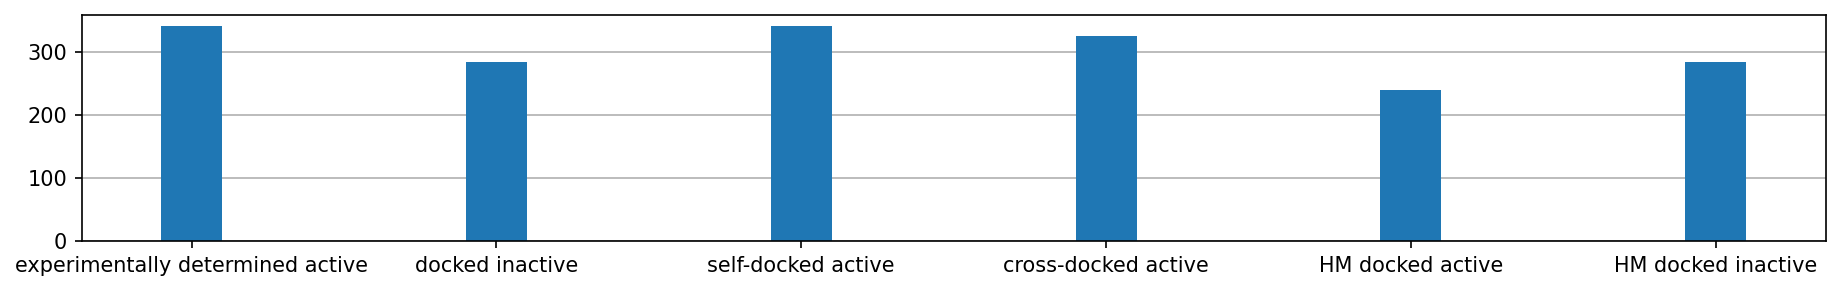

In [178]:
# plot displaying number of each entry type
structure_df['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [179]:
structure_df['Function'].value_counts()

Antagonist           664
Inactive             570
Agonist              480
Inverse agonist       73
Agonist (partial)     33
Name: Function, dtype: int64

In [180]:
structure_df['entry_type'].value_counts().sort_index()

HM docked active                    240
HM docked inactive                  285
cross-docked active                 326
docked inactive                     285
experimentally determined active    342
self-docked active                  342
Name: entry_type, dtype: int64

In [181]:
structure_df['entry_type'].value_counts().sum() # number of entries in the dataset

1820

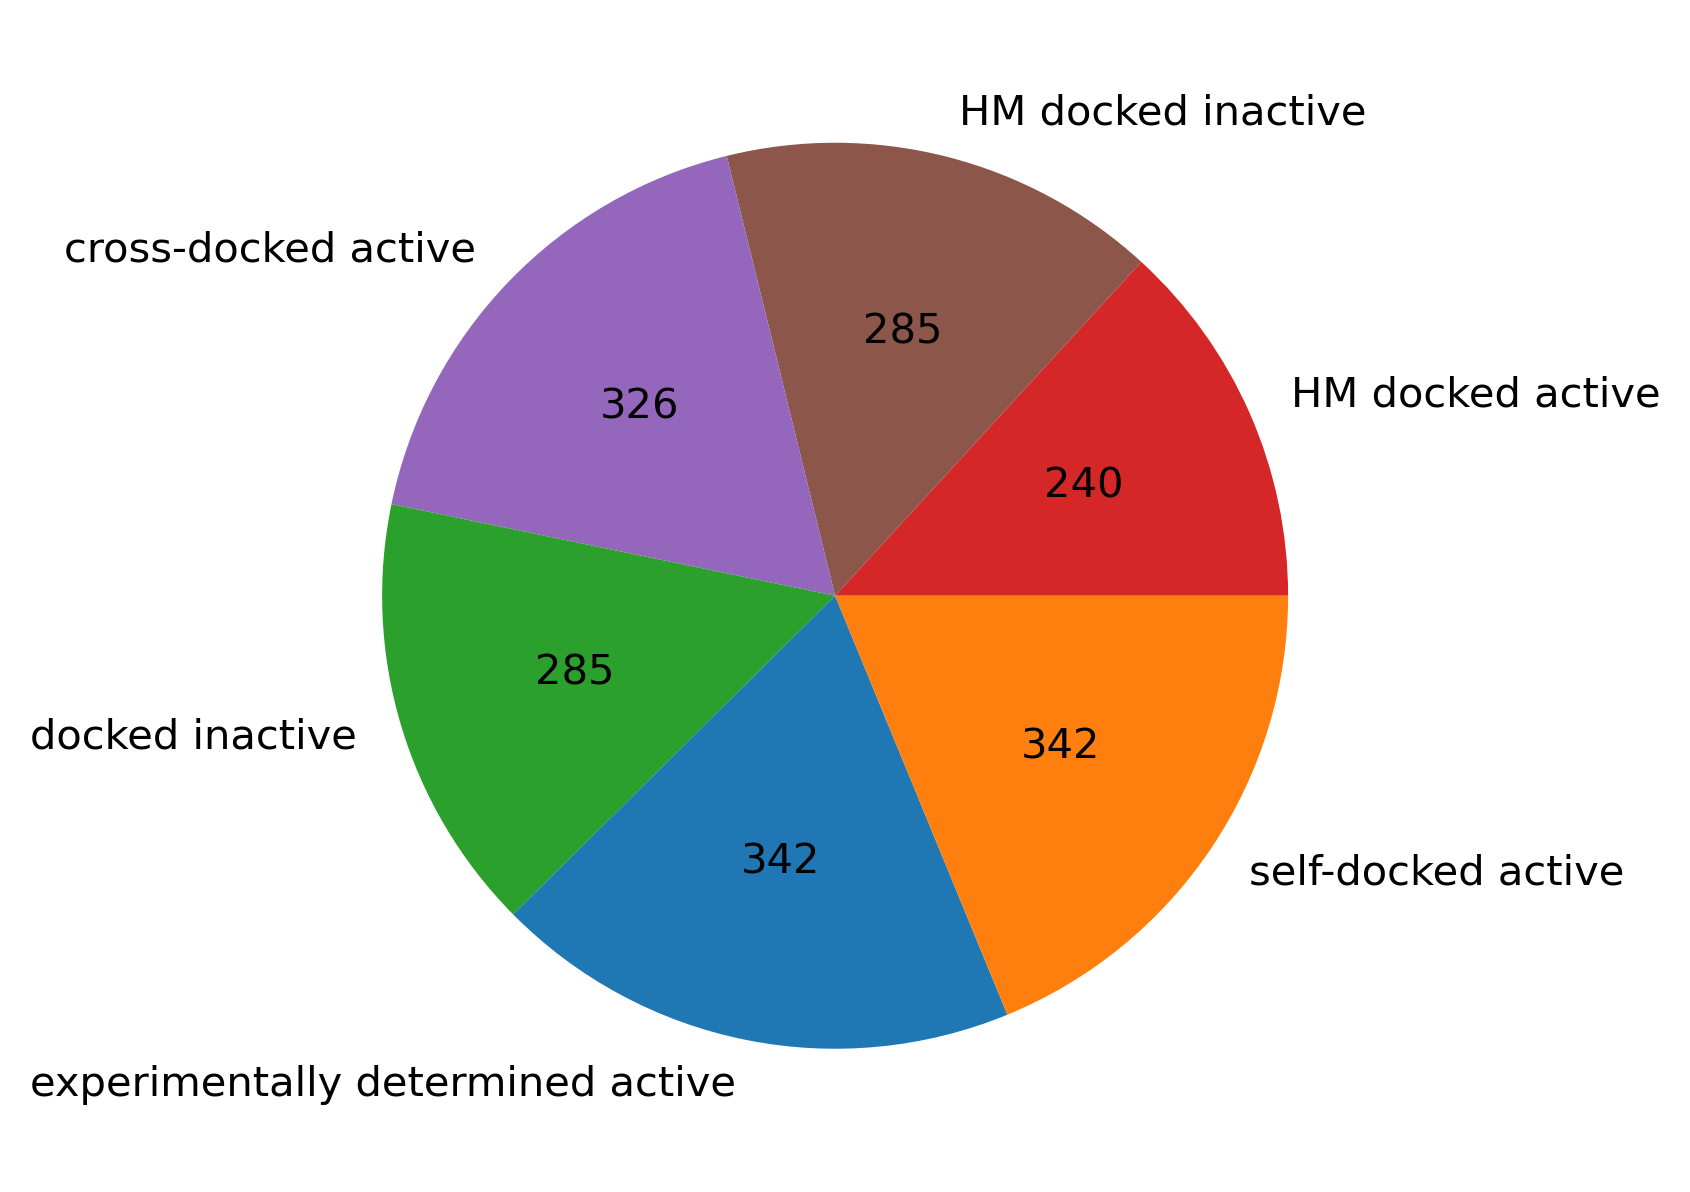

In [182]:
# pie chart

# color key
colors = {'experimentally determined active': 'tab:blue',
          'self-docked active': 'tab:orange',
          'cross-docked active': 'tab:purple',
          'docked inactive': 'tab:green',
          'HM docked active':'tab:red',
          'HM docked inactive':'tab:brown'
          
         }

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['figure.dpi'] = 300

values=structure_df['entry_type'].value_counts(dropna=True).sort_index()
vc = structure_df['entry_type'].value_counts(dropna=True).sort_index()
labels = vc.index

plt.pie(list(structure_df['entry_type'].value_counts().sort_index()),
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels]
       )
plt.show() 

In [183]:
# drop entry_type field but save it for later
entry_types = structure_df['entry_type']
structure_df.drop(['entry_type'], axis = 1, inplace = True)

In [184]:
# simplification: replace partial agonist with agonist
structure_df = structure_df.replace('Agonist (partial)', 'Agonist')

In [185]:
actual_fxns = structure_df['Function']

In [186]:
actual_fxns.unique()

array(['Agonist', 'Antagonist', 'Inverse agonist', 'Inactive'],
      dtype=object)

## Label Encoding

In [187]:
# convert inttype columns to string and get unique interaction types
interaction_types = []
inttype_cols = [col for col in structure_df.columns if 'inttype' in col]

for col in inttype_cols:
    structure_df[col] = structure_df[col].astype(str)
    uniq_col_ints = list(structure_df[col].unique())
    for interaction in uniq_col_ints:
        if interaction not in interaction_types:
            interaction_types.append(interaction)

In [188]:
interaction_types

['nan', 'None', 'Distance', 'Hbond', 'Arene', 'Ionic', 'Covalent']

In [189]:
# custom encoding for inttypes
custom_mapping = {'nan' : 0, 'None' : 1, 'Hbond' : 2, 'Distance' : 3, 'Arene' : 4, 'Ionic' : 5, 'Covalent' : 6}

for col in inttype_cols:
    structure_df[col] = structure_df[col].map(custom_mapping)
    
# LabelEncoder for Function labels
le = LabelEncoder()

# get Function columns
cols = [col for col in structure_df.columns if 'Function' in col]

# loop though all columns and convert strings to categorical integer variable
for col in cols:
    structure_df[col] = le.fit_transform(structure_df[col])

In [190]:
structure_df

,PDBID,Function,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,...,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,5.28_intenergysum,5.28_inttype1,5.28_intenergy1,5.28_inttype2,5.28_intenergy2
0,7EW2,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
1,7EW3,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
2,7EW4,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
3,7EW1,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
4,7LD4,0,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,d3_nc,2,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
1865,d3_nc,2,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
1866,d3_nc,2,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN
1867,d3_nc,2,NaN,0,NaN,0,NaN,NaN,0,NaN,...,NaN,0,NaN,0,NaN,NaN,0,NaN,0,NaN


In [191]:
le.classes_

array(['Agonist', 'Antagonist', 'Inactive', 'Inverse agonist'],
      dtype=object)

In [192]:
# assign target classes to y
y = structure_df['Function']

# assign data to X
X = structure_df.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X['actual_fxn'] = actual_fxns

In [193]:
X

,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,...,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,5.28_intenergysum,5.28_inttype1,5.28_intenergy1,5.28_inttype2,5.28_intenergy2,actual_fxn
0,7EW2,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Agonist
1,7EW3,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Agonist
2,7EW4,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Agonist
3,7EW1,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Agonist
4,7LD4,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Agonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive
1865,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive
1866,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive
1867,d3_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,0,NaN,NaN,0,NaN,0,NaN,Inactive


In [194]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [195]:
# function to drop columns from train_df and test_df that are all NaN in test_df
def drop_nan_cols_match(train_df, test_df):
    empty_cols = []
    train_cols = list(train_df.columns)
    test_cols = list(test_df.columns)
    
    for test_col in test_cols:
        if sum(test_df[test_col].isnull()) == test_df.shape[0]:
            empty_cols.append(test_col)

    train_df.drop(empty_cols, axis = 1, inplace = True)
    test_df.drop(empty_cols, axis = 1, inplace = True)

In [196]:
drop_nan_cols_match(X_train, X_test)

In [197]:
len(X_train.columns)

1661

In [198]:
len(X_test.columns)

1661

## Scaling/Imputing

In [199]:
def scale_impute(dataframe):
    # get colnames
    colnames = list(dataframe.drop(['actual_fxn', 'PDBID'], axis = 1).columns)
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 

    # #rename columns
    df_imputed.columns = colnames
    
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [200]:
(X_train_imputed, X_train_fxns) = scale_impute(X_train)
(X_test_imputed, X_test_fxns) = scale_impute(X_test)

,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,...,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,5.28_intenergysum,5.28_inttype1,5.28_intenergy1,5.28_inttype2,5.28_intenergy2
0,7JVP,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
1,6D27,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
2,beta2_nc,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
3,beta1_bc_inactivehm,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
4,6PT0,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,6TP6,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
1361,beta2_nc,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
1362,5WIU,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0
1363,4PY0,0.0,-0.071796,0.0,-0.071796,0.0,0.0,-0.071796,0.0,-0.071796,...,0.0,-0.094176,0.0,-0.094176,0.0,0.0,-0.038306,0.0,-0.038306,0.0


,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,...,7.68_intenergysum,7.68_inttype1,7.68_intenergy1,7.68_inttype2,7.68_intenergy2,5.28_intenergysum,5.28_inttype1,5.28_intenergy1,5.28_inttype2,5.28_intenergy2
0,6PS6,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
1,5C1M,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
2,3EML,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
3,3NYA,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
4,3PBL,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,d3_bc_inactivehm,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
451,7V3Z,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
452,beta2_nc,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0
453,3SN6,0.0,-0.066446,0.0,-0.066446,0.0,0.0,-0.066446,0.0,-0.066446,...,0.0,-0.115599,0.0,-0.115599,0.0,0.0,-0.046932,0.0,-0.046932,0.0


<AxesSubplot:>

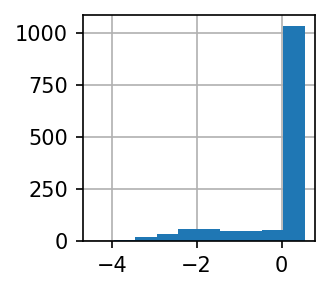

In [201]:
plt.rcParams["figure.figsize"] = (2,2)
plt.rcParams['figure.dpi'] = 150
X_train_imputed['3.32_intenergysum'].hist()

In [202]:
X_train_fxns = X_train_fxns.reset_index()
X_train_fxns.drop(['index'], axis = 1, inplace = True)

X_test_fxns = X_test_fxns.reset_index()
X_test_fxns.drop(['index'], axis = 1, inplace = True)

In [203]:
def y_encode(y):
    from keras.utils import np_utils

    # encode class values as integers
    l_encoder = LabelEncoder()
    l_encoder.fit(y)
    encoded_Y = l_encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_Y)
    
    return dummy_y

In [204]:
len(X_train_imputed.columns)

1660

In [205]:
# keras imports
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


# define baseline model
def baseline_model():
    # create model
    model = keras.Sequential()
    model.add(layers.Dense(len(X_train_imputed.columns) - 1, input_shape=[len(X_train_imputed.columns) - 1], activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(round(((len(X_train_imputed.columns) - 1) + 4) / 2), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_test_predict(train_df, train_y, test_df, test_y, encoder):
    # early stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=10,
        min_delta=0.001,
        restore_best_weights=True,
    )

    
    # KerasClassifier wrapper for model
#     estimator = KerasClassifier(baseline_model(), epochs=1000, batch_size=32, verbose=1)
    estimator = KerasClassifier(baseline_model(), epochs=1000, batch_size=32, verbose=2, callbacks=[early_stopping])
    print(estimator.model.summary())

    # fit model
    estimator.fit(train_df.iloc[:, 1:], y_encode(y_train))

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(estimator, train_df.iloc[:, 1:], y_encode(y_train), cv=kfold, scoring = 'accuracy')
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

    # make predictions on the test set
    y_preds_np = estimator.predict(test_df.iloc[:, 1:])

    # extract predictions from test_preds_np ndarray and convert them to a list
    y_preds = []
    for x in y_preds_np:
        pred, = np.where(x == 1)
        y_preds.append(pred.tolist()[0])

    # TEST SET CONFUSION MATRIX
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_preds)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')

     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_preds)
    precision = metrics.precision_score(test_y, y_preds, average = 'weighted', labels=np.unique(y_preds))
    recall = metrics.recall_score(test_y, y_preds, average = 'weighted', labels=np.unique(y_preds))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')
    
    return y_pred_actual, y_test_actual, estimator

In [206]:
y_pred_actual, y_test_actual, ks_model = train_test_predict(X_train_imputed, y_train, X_test_imputed, y_test, le)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1659)              2753940   
                                                                 
 dropout_28 (Dropout)        (None, 1659)              0         
                                                                 
 dense_43 (Dense)            (None, 832)               1381120   
                                                                 
 dropout_29 (Dropout)        (None, 832)               0         
                                                                 
 dense_44 (Dense)            (None, 4)                 3332      
                                                                 
Total params: 4,138,392
Trainable params: 4,138,392
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
43/43 - 1s - loss: 1.0411

Epoch 1/1000
39/39 - 1s - loss: 0.0047 - accuracy: 0.9976 - 1s/epoch - 30ms/step
Epoch 2/1000
39/39 - 1s - loss: 0.0137 - accuracy: 0.9951 - 846ms/epoch - 22ms/step
Epoch 3/1000
39/39 - 1s - loss: 0.0310 - accuracy: 0.9951 - 861ms/epoch - 22ms/step
Epoch 4/1000
39/39 - 1s - loss: 0.0323 - accuracy: 0.9902 - 874ms/epoch - 22ms/step
Epoch 5/1000
39/39 - 1s - loss: 0.0644 - accuracy: 0.9821 - 891ms/epoch - 23ms/step
Epoch 6/1000
39/39 - 1s - loss: 0.0621 - accuracy: 0.9788 - 912ms/epoch - 23ms/step
Epoch 7/1000
39/39 - 1s - loss: 0.0407 - accuracy: 0.9919 - 883ms/epoch - 23ms/step
Epoch 8/1000
39/39 - 1s - loss: 0.0289 - accuracy: 0.9870 - 853ms/epoch - 22ms/step
Epoch 9/1000
39/39 - 1s - loss: 0.0115 - accuracy: 0.9951 - 864ms/epoch - 22ms/step
Epoch 10/1000
39/39 - 1s - loss: 0.0168 - accuracy: 0.9935 - 875ms/epoch - 22ms/step
Epoch 11/1000
39/39 - 1s - loss: 0.0340 - accuracy: 0.9878 - 908ms/epoch - 23ms/step
5/5 - 0s - 89ms/epoch - 18ms/step
INFO:tensorflow:Assets written to: C:\Users

Epoch 19/1000
39/39 - 1s - loss: 0.0833 - accuracy: 0.9731 - 848ms/epoch - 22ms/step
5/5 - 0s - 62ms/epoch - 12ms/step
INFO:tensorflow:Assets written to: C:\Users\Greg\AppData\Local\Temp\tmpymu0im9f\assets
INFO:tensorflow:Assets written to: C:\Users\Greg\AppData\Local\Temp\tmp817otwgw\assets
Epoch 1/1000
39/39 - 1s - loss: 0.0111 - accuracy: 0.9959 - 1s/epoch - 29ms/step
Epoch 2/1000
39/39 - 1s - loss: 0.0540 - accuracy: 0.9894 - 835ms/epoch - 21ms/step
Epoch 3/1000
39/39 - 1s - loss: 0.0392 - accuracy: 0.9919 - 850ms/epoch - 22ms/step
Epoch 4/1000
39/39 - 1s - loss: 0.0585 - accuracy: 0.9854 - 821ms/epoch - 21ms/step
Epoch 5/1000
39/39 - 1s - loss: 0.0512 - accuracy: 0.9854 - 837ms/epoch - 21ms/step
Epoch 6/1000
39/39 - 1s - loss: 0.0309 - accuracy: 0.9894 - 864ms/epoch - 22ms/step
Epoch 7/1000
39/39 - 1s - loss: 0.0361 - accuracy: 0.9894 - 848ms/epoch - 22ms/step
Epoch 8/1000
39/39 - 1s - loss: 0.0425 - accuracy: 0.9878 - 821ms/epoch - 21ms/step
Epoch 9/1000
39/39 - 1s - loss: 0.0695

In [207]:
pd.options.mode.chained_assignment = None

# X_test['function'] = y_test_actual
X_test['pred_function'] = y_pred_actual
X_test['entry_type'] = entry_types

X_train['entry_type'] = entry_types

In [208]:
X_train['entry_type'].value_counts().sort_index()

HM docked active                    160
HM docked inactive                  221
cross-docked active                 247
docked inactive                     219
experimentally determined active    252
self-docked active                  266
Name: entry_type, dtype: int64

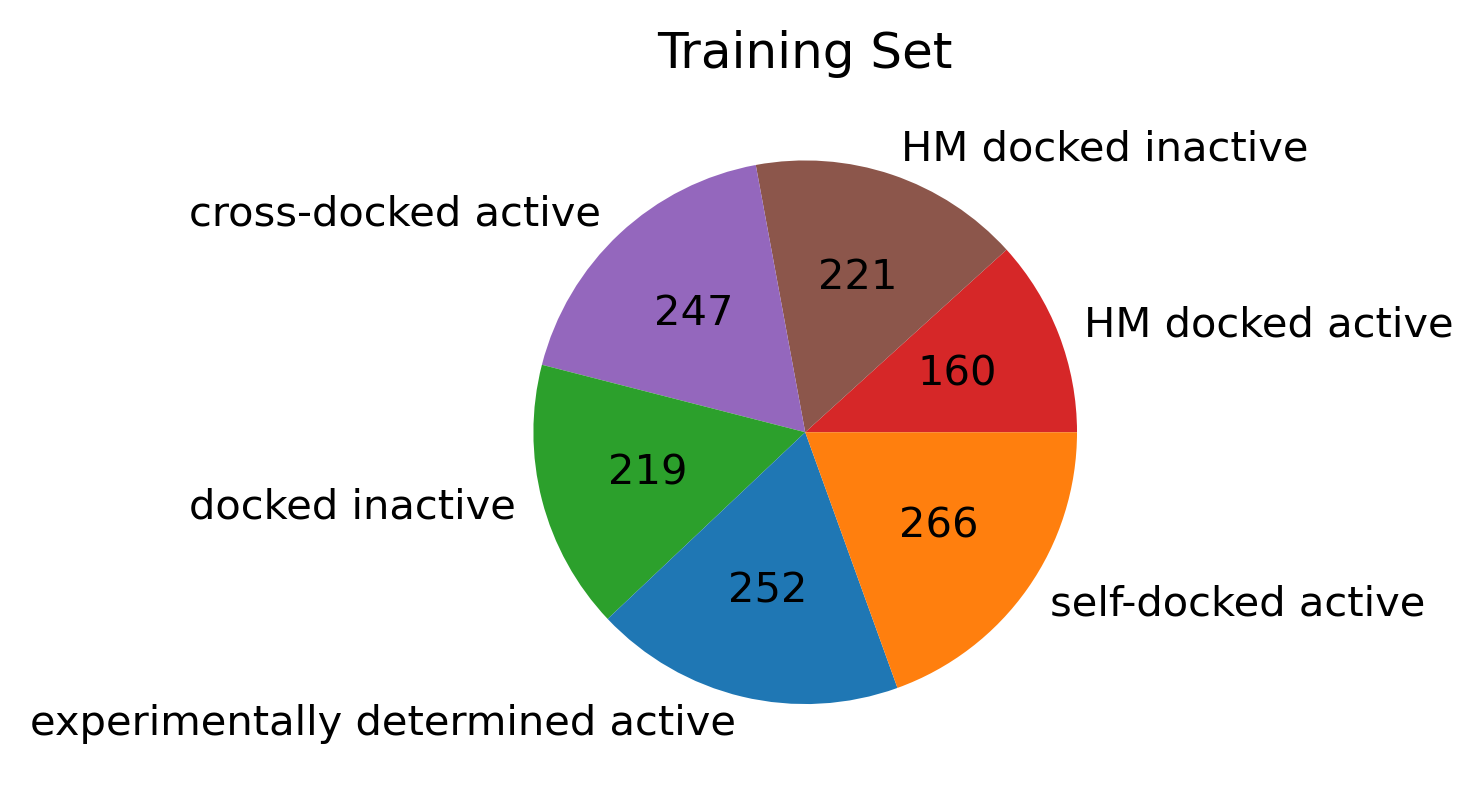

In [209]:
# plot to show training set size
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 300

values=X_train['entry_type'].value_counts(dropna=True).sort_index()
vc = X_train['entry_type'].value_counts().sort_index()
labels = vc.index

plt.pie(vc,
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels]
       )
plt.title('Training Set')
plt.show() 

In [210]:
X_test['entry_type'].value_counts().sort_index()

HM docked active                    80
HM docked inactive                  64
cross-docked active                 79
docked inactive                     66
experimentally determined active    90
self-docked active                  76
Name: entry_type, dtype: int64

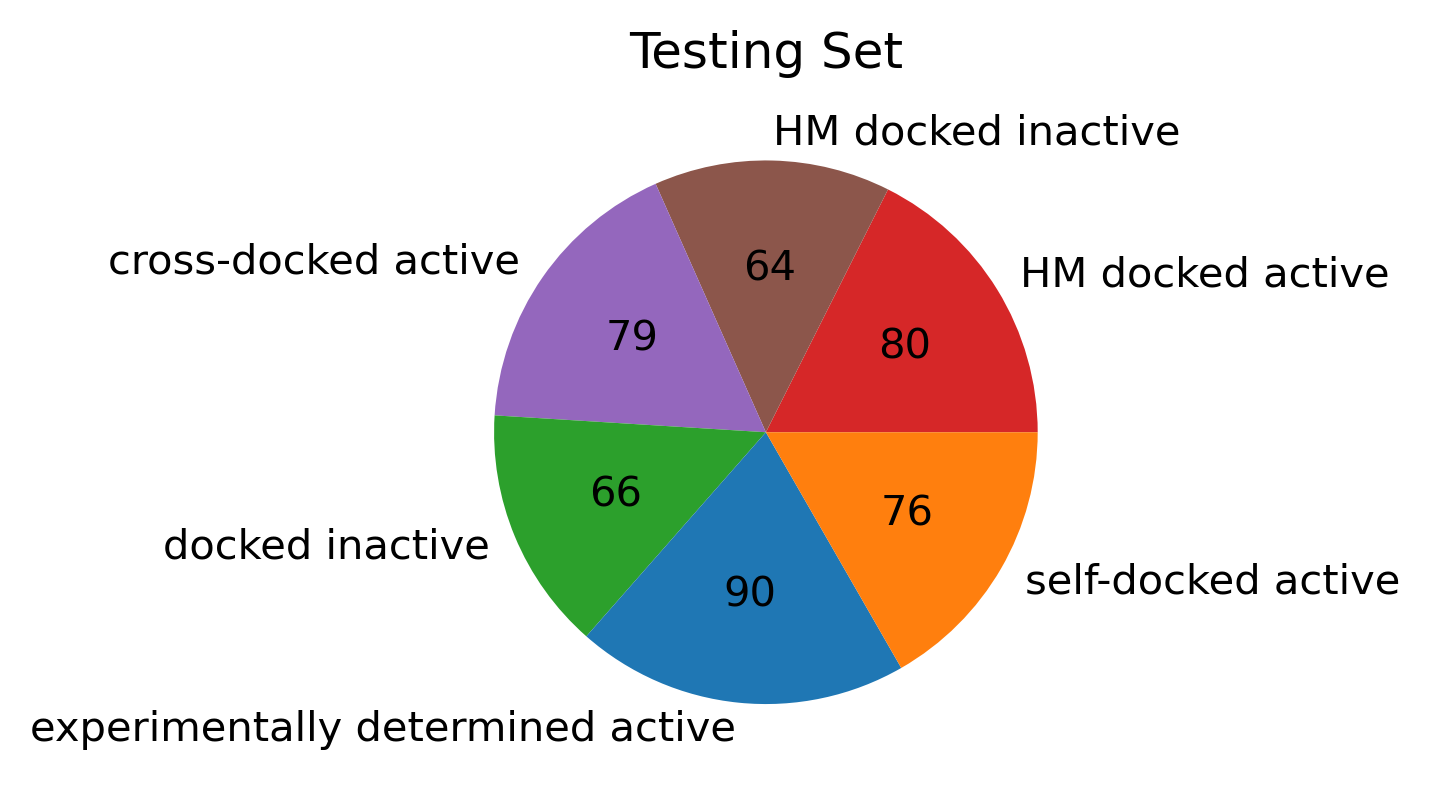

In [211]:
# plot to show testing set size
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 300

values=X_test['entry_type'].value_counts(dropna=True).sort_index()
vc = X_test['entry_type'].value_counts().sort_index()
labels = vc.index

plt.pie(vc,
        labels = labels,
        autopct= lambda x: '{:.0f}'.format(x*values.sum()/100),
        colors = [colors[key] for key in labels],
       )
plt.title('Testing Set')
plt.show() 

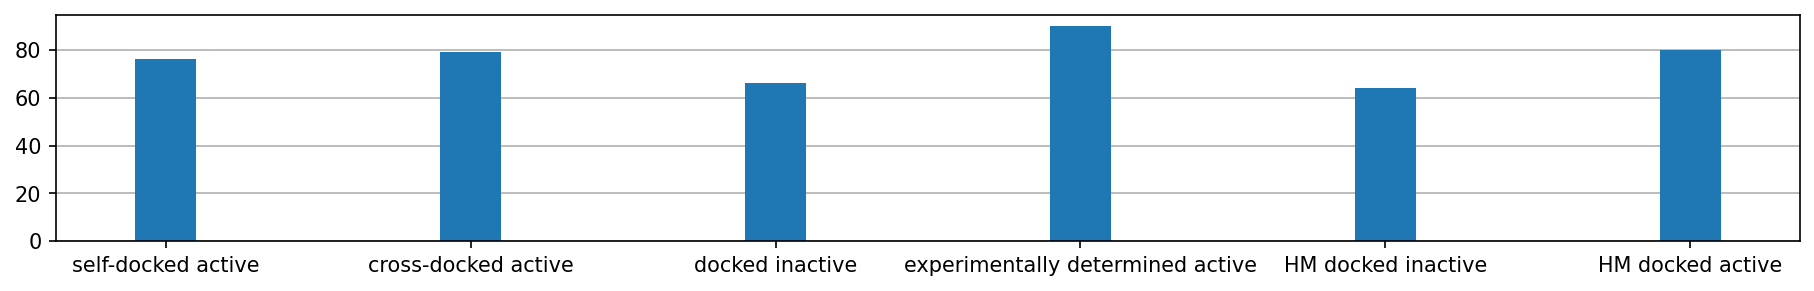

In [212]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["figure.figsize"] = (15,2)
plt.rcParams['figure.dpi'] = 150
X_test['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [213]:
# get incorrect predictions in test set

entries = []
for i in range(len(X_test)):
    if X_test['actual_fxn'].iloc[i] != X_test['pred_function'].iloc[i]:
        entries.append(i)

wrong_preds_df = X_test.iloc[entries,:]

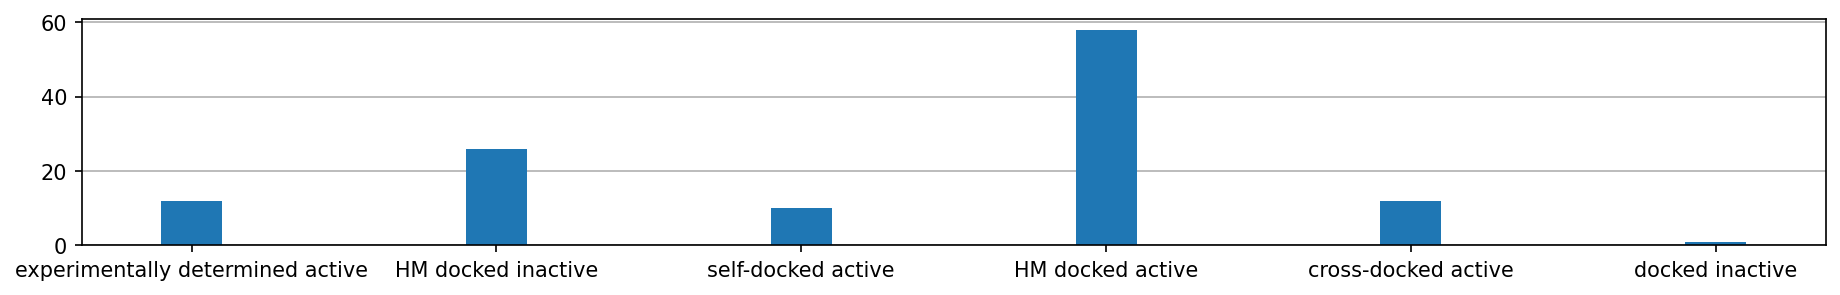

In [214]:
# histogram denoting which entry type is most frequently predicted incorrectly
wrong_preds_df['entry_type'].hist(align='mid', bins = np.arange(7) - 0.5, rwidth = 0.2).grid(axis='x')

In [215]:
# print('Entry Type\tIncorrect\tNum. Entries\tPercent Incorrect\tPercent Correct')

entry_types_uniq = []
incorrects = []
num_entries = []
percent_incorrect = []
percent_correct = []
for x in ['experimentally determined active', 'docked inactive', 'self-docked active', 'cross-docked active', 'HM docked active', 'HM docked inactive']:
    num_test_entries = len(X_test.loc[X_test['entry_type'] == x])
    incorrect_test_entries = len(wrong_preds_df.loc[X_test['entry_type'] == x])
    percent = (incorrect_test_entries / num_test_entries) * 100
    
    # append each value to lists to be used for df construction
    entry_types_uniq.append(x)
    incorrects.append(incorrect_test_entries)
    num_entries.append(num_test_entries)
    percent_incorrect.append("{:.2f}".format(percent))
    percent_correct.append("{:.2f}".format(100 - percent))
#     print(x, '\t', incorrect_test_entries, '\t\t', num_test_entries, '\t\t', percent, '\t', 100 - percent)

# dataframe construction/display
results_df = pd.DataFrame({
    'Entry Type': entry_types_uniq,
    'Incorrect': incorrects,
    'Num. Entries' : num_entries,
    'Percent Incorrect' : percent_incorrect,
    'Percent Correct' : percent_correct
})

display(results_df)

,Entry Type,Incorrect,Num. Entries,Percent Incorrect,Percent Correct
0,experimentally determined active,12,90,13.33,86.67
1,docked inactive,1,66,1.52,98.48
2,self-docked active,10,76,13.16,86.84
3,cross-docked active,12,79,15.19,84.81
4,HM docked active,58,80,72.50,27.50
5,HM docked inactive,26,64,40.62,59.38


In [51]:
X_test_HM_docked_active = X_test[X_test['entry_type'] == 'HM docked active']
X_test_HM_docked_inactive = X_test[X_test['entry_type'] == 'HM docked inactive']

In [52]:
X_test

,PDBID,1.21_intenergysum,1.21_inttype1,1.21_intenergy1,1.21_inttype2,1.21_intenergy2,1.22_intenergysum,1.22_inttype1,1.22_intenergy1,1.22_inttype2,...,7.68_inttype2,7.68_intenergy2,5.28_intenergysum,5.28_inttype1,5.28_intenergy1,5.28_inttype2,5.28_intenergy2,actual_fxn,pred_function,entry_type
925,6PS6,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Antagonist,Antagonist,self-docked active
1058,5C1M,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Antagonist,Antagonist,cross-docked active
373,3EML,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Inactive,Inactive,docked inactive
764,3NYA,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Antagonist,Inverse agonist,self-docked active
645,3PBL,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Inactive,Inactive,docked inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,d3_bc_inactivehm,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Agonist,Agonist,HM docked active
1001,7V3Z,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Agonist,Agonist,self-docked active
1553,beta2_nc,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Antagonist,Inactive,HM docked active
773,3SN6,NaN,0,NaN,0,NaN,NaN,0,NaN,0,...,0,NaN,NaN,0,NaN,0,NaN,Agonist,Agonist,self-docked active


In [53]:
pd.crosstab(X_test_HM_docked_active['actual_fxn'], X_test_HM_docked_active['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Agonist,Antagonist,Inactive
Actual,,,
Agonist,7,5,22
Antagonist,9,2,35


In [54]:
pd.crosstab(X_test_HM_docked_inactive['actual_fxn'], X_test_HM_docked_inactive['pred_function'], rownames=['Actual'], colnames=['Predicted'])

Predicted,Agonist,Inactive
Actual,,
Inactive,4,60


## GridSearch for best RF parameters

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [56]:
params_to_test = {
    'n_estimators':[10, 100, 250, 500, 750, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
rf_model = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='accuracy')

grid_search.fit(X_train_imputed.iloc[:, 1:], y_train)

best_params = grid_search.best_params_ 

print(best_params)

In [61]:
grid_search.best_score_

0.7918473593817089